<a href="https://colab.research.google.com/github/payares0510/metodos-computacionales-1/blob/main/Solucion_minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El punto solución usando mínimos cuadrados es: [1.42857143 0.42857143]


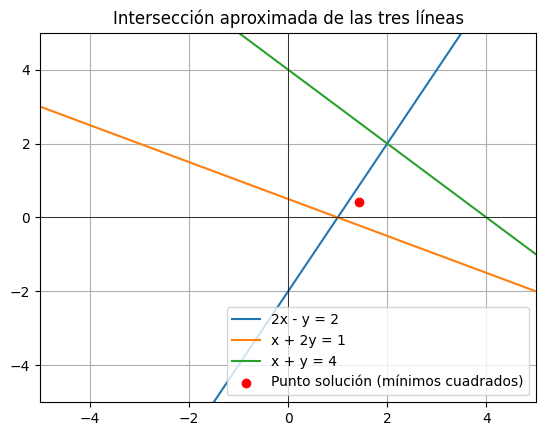

In [ ]:
#punto 1#
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[2, -1], [1, 2], [1, 1]])
b = np.array([2, 1, 4])
x_ls = np.linalg.inv(A.T @ A) @ A.T @ b
print(f"El punto solución usando mínimos cuadrados es: {x_ls}")
x_vals = np.linspace(-5, 5, 400)
y_line1 = 2 * x_vals - 2
y_line2 = (1 - x_vals) / 2
y_line3 = 4 - x_vals
plt.plot(x_vals, y_line1, label="2x - y = 2")
plt.plot(x_vals, y_line2, label="x + 2y = 1")
plt.plot(x_vals, y_line3, label="x + y = 4")
plt.scatter(x_ls[0], x_ls[1], color='red', label='Punto solución (mínimos cuadrados)')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.title('Intersección aproximada de las tres líneas')
plt.show()

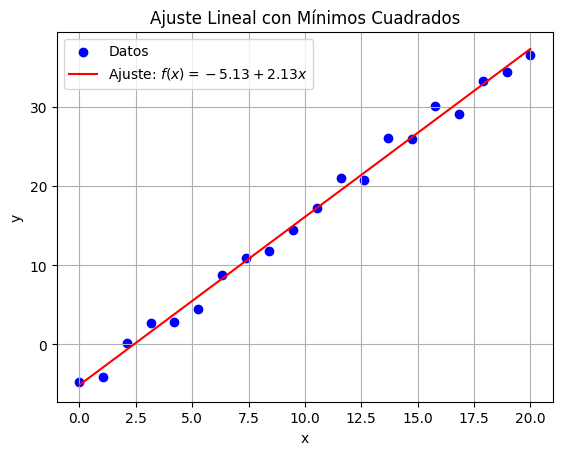

Parámetro a0: -5.129185528852978
Parámetro a1: 2.1250368080082747


In [ ]:
#punto 2#
import numpy as np
import matplotlib.pyplot as plt
import urllib

url = 'https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosLineal.txt'
response = urllib.request.urlopen(url)
data = np.loadtxt(response)
x = data[:, 0]
y = data[:, 1]
A = np.vstack([x, np.ones(len(x))]).T
a1, a0 = np.linalg.lstsq(A, y, rcond=None)[0]
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, a0 + a1 * x, 'r', label=f'Ajuste: $f(x) = {a0:.2f} + {a1:.2f}x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal con Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()

print(f"Parámetro a0: {a0}")
print(f"Parámetro a1: {a1}")


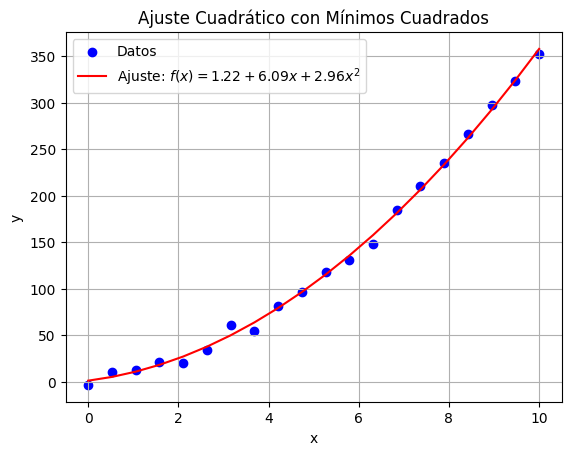

Parámetro a0: 1.2213205361710062
Parámetro a1: 6.090752046361974
Parámetro a2: 2.956587401773893


In [ ]:
#punto 3#
import numpy as np
import matplotlib.pyplot as plt
import urllib

url = 'https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
response = urllib.request.urlopen(url)
data = np.loadtxt(response)
x = data[:, 0]
y = data[:, 1]
A = np.vstack([x**2, x, np.ones(len(x))]).T
a2, a1, a0 = np.linalg.lstsq(A, y, rcond=None)[0]
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, a0 + a1*x + a2*x**2, 'r', label=f'Ajuste: $f(x) = {a0:.2f} + {a1:.2f}x + {a2:.2f}x^2$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Cuadrático con Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()
print(f"Parámetro a0: {a0}")
print(f"Parámetro a1: {a1}")
print(f"Parámetro a2: {a2}")


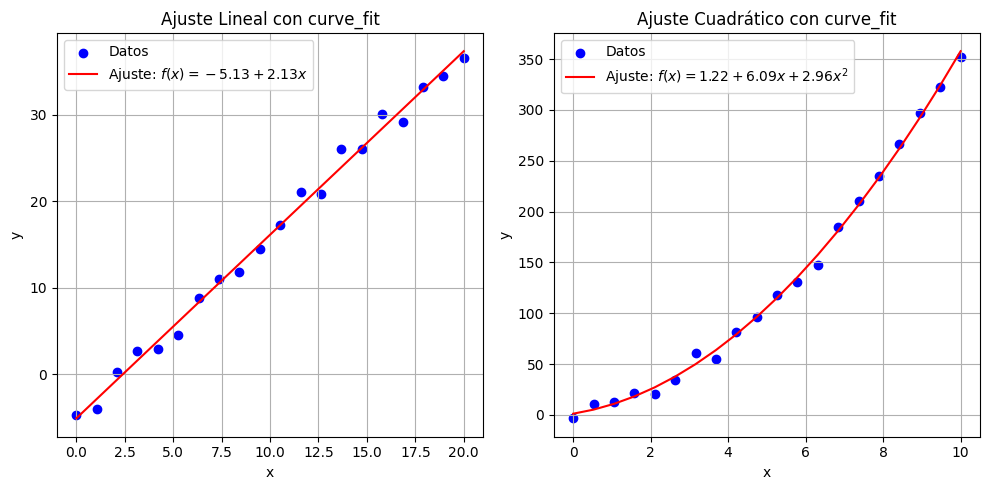

Parámetros ajuste lineal: a0 = -5.13, a1 = 2.13
Parámetros ajuste cuadrático: a0 = 1.22, a1 = 6.09, a2 = 2.96


In [ ]:
#punto 4#
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import urllib

url_lineal = 'https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosLineal.txt'
response_lineal = urllib.request.urlopen(url_lineal)
data_lineal = np.loadtxt(response_lineal)
url_cuadratico = 'https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
response_cuadratico = urllib.request.urlopen(url_cuadratico)
data_cuadratico = np.loadtxt(response_cuadratico)
x_lineal = data_lineal[:, 0]
y_lineal = data_lineal[:, 1]
x_cuadratico = data_cuadratico[:, 0]
y_cuadratico = data_cuadratico[:, 1]
def funcion_lineal(x, a0, a1):
    return a0 + a1 * x

def funcion_cuadratica(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

popt_lineal, _ = curve_fit(funcion_lineal, x_lineal, y_lineal)
popt_cuadratico, _ = curve_fit(funcion_cuadratica, x_cuadratico, y_cuadratico)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_lineal, y_lineal, label='Datos', color='blue')
plt.plot(x_lineal, funcion_lineal(x_lineal, *popt_lineal), 'r', label=f'Ajuste: $f(x) = {popt_lineal[0]:.2f} + {popt_lineal[1]:.2f}x$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal con curve_fit')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(x_cuadratico, y_cuadratico, label='Datos', color='blue')
plt.plot(x_cuadratico, funcion_cuadratica(x_cuadratico, *popt_cuadratico), 'r', label=f'Ajuste: $f(x) = {popt_cuadratico[0]:.2f} + {popt_cuadratico[1]:.2f}x + {popt_cuadratico[2]:.2f}x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Cuadrático con curve_fit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
print(f"Parámetros ajuste lineal: a0 = {popt_lineal[0]:.2f}, a1 = {popt_lineal[1]:.2f}")
print(f"Parámetros ajuste cuadrático: a0 = {popt_cuadratico[0]:.2f}, a1 = {popt_cuadratico[1]:.2f}, a2 = {popt_cuadratico[2]:.2f}")


Parámetro a0: 2.2
Parámetro a1: 0.6


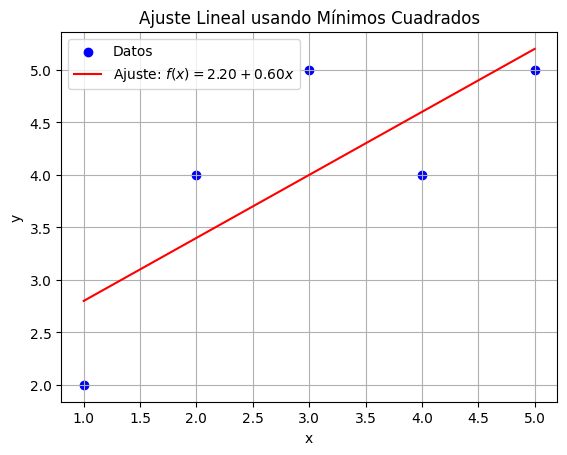

In [ ]:
#punto 6#
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)
a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
a0 = (sum_y - a1 * sum_x) / n

print(f"Parámetro a0: {a0}")
print(f"Parámetro a1: {a1}")

plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, a0 + a1 * x, 'r', label=f'Ajuste: $f(x) = {a0:.2f} + {a1:.2f}x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal usando Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()


Parámetro a0: 1.399999999999984
Parámetro a1: 0.614285714285726
Parámetro a2: 0.2142857142857125


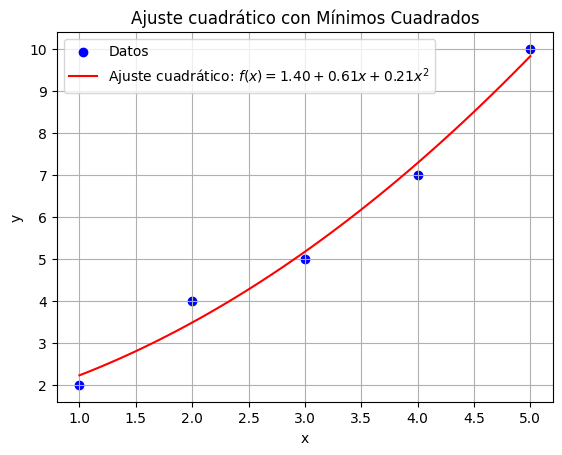

In [ ]:
#punto 6 opcional#
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 7, 10])
n = len(x)
sum_x = np.sum(x)
sum_x2 = np.sum(x**2)
sum_x3 = np.sum(x**3)
sum_x4 = np.sum(x**4)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2y = np.sum(x**2 * y)
A = np.array([
    [n, sum_x, sum_x2],
    [sum_x, sum_x2, sum_x3],
    [sum_x2, sum_x3, sum_x4]
])
B = np.array([sum_y, sum_xy, sum_x2y])
a0, a1, a2 = np.linalg.solve(A, B)
print(f"Parámetro a0: {a0}")
print(f"Parámetro a1: {a1}")
print(f"Parámetro a2: {a2}")
plt.scatter(x, y, label='Datos', color='blue')
x_fit = np.linspace(min(x), max(x), 100)
y_fit = a0 + a1 * x_fit + a2 * x_fit**2
plt.plot(x_fit, y_fit, 'r', label=f'Ajuste cuadrático: $f(x) = {a0:.2f} + {a1:.2f}x + {a2:.2f}x^2$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste cuadrático con Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#punto 7#
import numpy as np

u1 = np.array([3, 1, 0, 1])
u2 = np.array([1, 2, 1, 1])
u3 = np.array([-1, 0, 2, -1])
b = np.array([-3, -3, 8, 9])
A = np.column_stack([u1, u2, u3])
x = np.linalg.lstsq(A, b, rcond=None)[0]
projection = A @ x

print("La proyección ortogonal de b sobre el subespacio W es:", projection)


def gram_schmidt(vectors):
    orthonormal_basis = []
    for v in vectors:
        for u in orthonormal_basis:
            v = v - np.dot(v, u) * u
        v = v / np.linalg.norm(v)
        orthonormal_basis.append(v)
    return np.array(orthonormal_basis)
vectors = np.array([u1, u2, u3])
ortonormal_basis = gram_schmidt(vectors)
coefficients = np.dot(ortonormal_basis, b)
projection_gram_schmidt = np.sum(coefficients[:, np.newaxis] * ortonormal_basis, axis=0)

print("La proyección ortogonal de b usando Gram-Schmidt es:", projection_gram_schmidt)


La proyección ortogonal de b sobre el subespacio W es: [-2.00000000e+00  3.00000000e+00  4.00000000e+00  5.55111512e-16]
La proyección ortogonal de b usando Gram-Schmidt es: [-2.00000000e+00  3.00000000e+00  4.00000000e+00  5.55111512e-16]


In [ ]:
#ultimo punto#
import numpy as np
import random

def LennardJones(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def EnergiaTotal(posiciones, epsilon=1, sigma=1):
    N = len(posiciones)
    energia = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(posiciones[i] - posiciones[j])
            if r != 0:
                energia += LennardJones(r, epsilon, sigma)
    return energia

N = 50
tamano_poblacion = 50
num_generaciones = 100
tasa_mutacion = 0.1
limites = (-5, 5)

def inicializar_poblacion(tamano_poblacion, N, limites):
    poblacion = []
    for _ in range(tamano_poblacion):
        posiciones = np.random.uniform(limites[0], limites[1], (N, 3))
        poblacion.append(posiciones)
    return poblacion

def seleccion_por_torneo(poblacion, aptitudes, k=3):
    seleccionados = []
    for _ in range(len(poblacion)):
        participantes = random.sample(list(zip(poblacion, aptitudes)), k)
        ganador = min(participantes, key=lambda x: x[1])
        seleccionados.append(ganador[0])
    return seleccionados

def cruce(progenitor1, progenitor2):
    hijo = np.copy(progenitor1)
    for i in range(len(hijo)):
        if random.random() < 0.5:
            hijo[i] = progenitor2[i]
    return hijo

def mutacion(posiciones, tasa_mutacion, limites):
    mutado = np.copy(posiciones)
    for i in range(len(mutado)):
        if random.random() < tasa_mutacion:
            mutado[i] = np.random.uniform(limites[0], limites[1], 3)
    return mutado

def algoritmo_genetico():
    poblacion = inicializar_poblacion(tamano_poblacion, N, limites)
    mejor_solucion = None
    mejor_energia = float('inf')

    for generacion in range(num_generaciones):
        aptitudes = [EnergiaTotal(individuo) for individuo in poblacion]

        energia_minima = min(aptitudes)
        if energia_minima < mejor_energia:
            mejor_energia = energia_minima
            mejor_solucion = poblacion[np.argmin(aptitudes)]
            print(f"Generación {generacion}: Energía mínima = {mejor_energia}")

        seleccionados = seleccion_por_torneo(poblacion, aptitudes)

        nueva_poblacion = []
        for i in range(0, tamano_poblacion, 2):
            progenitor1 = seleccionados[i]
            progenitor2 = seleccionados[(i + 1) % tamano_poblacion]
            hijo1 = cruce(progenitor1, progenitor2)
            hijo2 = cruce(progenitor2, progenitor1)
            hijo1 = mutacion(hijo1, tasa_mutacion, limites)
            hijo2 = mutacion(hijo2, tasa_mutacion, limites)
            nueva_poblacion.extend([hijo1, hijo2])

        poblacion = nueva_poblacion[:tamano_poblacion]

    return mejor_solucion, mejor_energia

mejores_posiciones, mejor_energia = algoritmo_genetico()

print(f"\nEnergía mínima encontrada: {mejor_energia}")
print(f"Posiciones de las partículas en la configuración de mínima energía:\n{mejores_posiciones}")
